<a href="https://colab.research.google.com/github/retroduck385/-DATA100-Determining-Factors-of-Credit-Risk-Among-German-Clients/blob/main/%5BDATA100%5D_Group_1_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determining Factors of Credit Risk Among German Clients

**Group 1 - Banking and Finance**
- Dizon, Franchesca Raine R.
- Feliciano, Jan Robee E.
- Ng, Josh Denzel
- Paden, Seth Paolo O.
- Paquera, Arrow S.
- Penaflor, Neil Andrei C.
- Poniado, Jerielane P.
- Rana, Luis Miguel D. F.
- Realubit, Jezreel Hope P.
- Roque, Dominic Angelo M.
- Taran, Macaila Ricci B.

# Data Cleaning

### Importing the Dataset

In [ ]:
import pandas as pd
import numpy as np

df_credit = pd.read_csv('/content/german_credit_data.csv')

### Inspecting Dataset

In [ ]:
# Inspect the dataset and check data types of each column
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


### Check for Unique Values


| Variable           | Type                       | Values                                                                                 |
|--------------------|----------------------------|---------------------------------------------------------------------------------------|
| **Sex**            | Binary                    | `male`, `female`                                                                      |
| **Job**            | Ordinal (Employment Level) | - `0`: Unemployed / Unskilled - Non-resident <br> - `1`: Unskilled - Resident <br> - `2`: Skilled Employee / Official <br> - `3`: Highly Skilled / Management / Self-employed |
| **Housing**        | Nominal                   | `own`, `rent`, `free` (live rent-free)                                                |
| **Saving accounts**| Ordinal (Financial Status)| `little`, `moderate`, `rich`, `quite rich`, `NaN` (missing values)                    |
| **Checking account**| Ordinal (Financial Status)| `little`, `moderate`, `rich`, `NaN` (missing values)                                  |
| **Purpose**        | Nominal (Loan Purpose)    | `car`, `domestic appliances`, `education`, `furniture/equipment`, `radio/TV`, `repairs`, `vacation/others`, `business` |
| **Risk**           | Binary (Target Variable)  | `good`, `bad`                                                                         |


In [ ]:
#Checking for unique values
print(df_credit.nunique())

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64


In [ ]:
unique_sex_values = df_credit['Sex'].unique()
print(unique_sex_values)

unique_job_values = df_credit['Job'].unique()
print(unique_job_values)

unique_housing_values = df_credit['Housing'].unique()
print(unique_housing_values)

unique_saving_values = df_credit['Saving accounts'].unique()
print(unique_saving_values)

unique_checking_values = df_credit['Checking account'].unique()
print(unique_checking_values)



unique_purpose_values = df_credit['Purpose'].unique()
print(unique_purpose_values)


['male' 'female']
[2 1 3 0]
['own' 'free' 'rent']
[nan 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' nan 'rich']
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [ ]:
# Explore the target variable
print(df_credit['Risk'].value_counts())

Risk
good    700
bad     300
Name: count, dtype: int64


The dataset contains **1000 entries** with various features like **Age**, **Sex**, **Job**, and our target variable **Risk** **(indicating good or bad risk)**.

The target variable is moderately imbalanced with 700 "good" and 300 "bad" entries.

In [ ]:
df_credit.head(11)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


### Standardization of Column Names

In [ ]:
# Changing the column names to lowercase and replacing spaces (i.e. Saving accounts) with '_'
df_credit.columns = df_credit.columns.str.lower().str.replace(' ', '_')

# Let's also consider changing the of saving_accounts to saving_account to ensure consistency of column names
df_credit.rename(columns={'saving_accounts': 'saving_account'}, inplace=True)

df_credit.head()

,unnamed:_0,age,sex,job,housing,saving_account,checking_account,credit_amount,duration,purpose,risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


It appears to be that column ```unnamed:_0 ``` acts like an index and may not really add any value to our analysis. So we consider dropping this column.



In [ ]:
df_credit = df_credit.drop('unnamed:_0', inplace= False, axis=1)

# Confirm the dropped column
df_credit.head()

,age,sex,job,housing,saving_account,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
# Check for Negative Values
print(df_credit[df_credit['age'] < 0][['age', 'credit_amount']])  # Negative ages
print(df_credit[df_credit['credit_amount'] < 0][['age', 'credit_amount']])  # Negative credit amounts

Empty DataFrame
Columns: [age, credit_amount]
Index: []
Empty DataFrame
Columns: [age, credit_amount]
Index: []


In [ ]:
# Check for missing values
print("Missing Values")
print(df_credit.isnull().sum())

Missing Values
age                   0
sex                   0
job                   0
housing               0
saving_account      183
checking_account    394
credit_amount         0
duration              0
purpose               0
risk                  0
dtype: int64


Upon checking, there are missing values in `saving_accounts` and `checking_account`. Let us investigate further on how to address these Missing Values. NaN values may indicate that they have 'zero' money within that account, or the user might not have a saving/checkings account at all.

However, when we printed the first five rows of the dataset, we noticed that some rows have a non-NaN value in the `saving_account` variable and a NaN value in the `checking_acount` or vice versa (i.e. `saving_account` is NaN while `checking_account` is not NaN). In order for us to better address the missing values, we consider the two scenarios:

1. If both saving and checking accounts are NaN
2. Either one of saving or checking account is NaN


Since we're predicting credit risk based on these features, we can address these NaN values based on a person's credit_amount. Let's first investigate the credit_amount by getting the dsitribution of it.




count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64
credit_amount
1478    3
1262    3
1258    3
1275    3
1393    3
       ..
1459    1
882     1
3758    1
1136    1
4576    1
Name: count, Length: 921, dtype: int64


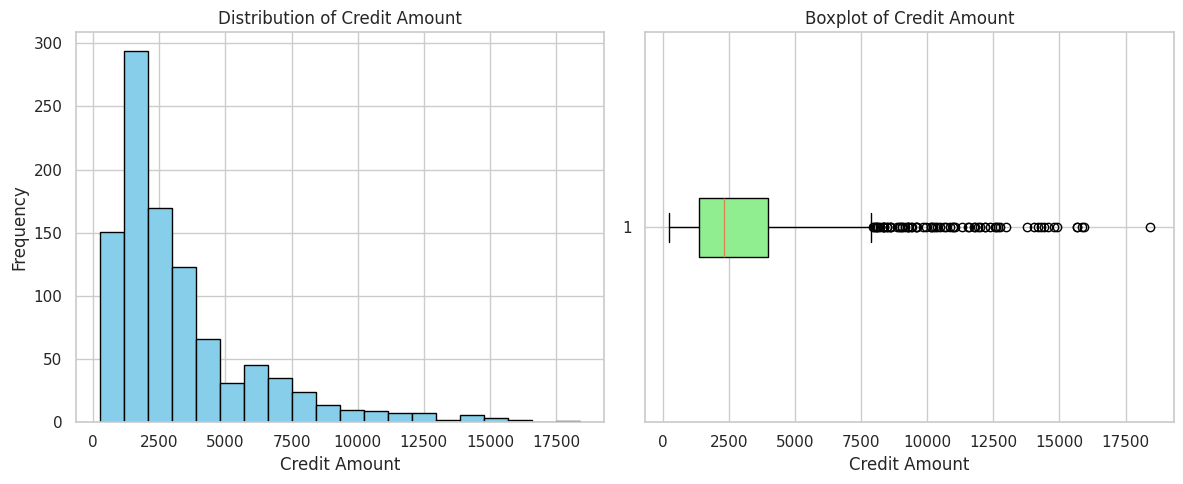

In [ ]:
# Let's first check the distribution of credit_amount
print(df_credit['credit_amount'].describe())
print(df_credit['credit_amount'].value_counts())
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First plot: Histogram
axes[0].hist(df_credit['credit_amount'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Credit Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Credit Amount')

# Second plot: Boxplot
axes[1].boxplot(df_credit['credit_amount'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_xlabel('Credit Amount')
axes[1].set_title('Boxplot of Credit Amount')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


To address the missing values in the `saving_account` and `checking_account` columns, we analyzed the distribution of `credit_amount`. The descriptive statistics and histogram revealed a positively skewed distribution with most values concentrated below 5,000. Based on this analysis, the following thresholds were defined:

- **Little**: `credit_amount ≤ 1,365` (Below the 25th percentile, representing low financial capacity)
- **Moderate**: `1,365 < credit_amount ≤ 3,972` (Between the 25th and 75th percentiles, representing average capacity)
- **Rich**: `3,972 < credit_amount ≤ 10,000` (Above the 75th percentile, excluding extreme outliers)
- **Quite Rich**: `credit_amount > 10,000` (Top 10%, indicating significant financial resources)

These thresholds ensure the imputation logic is grounded in observed data patterns rather than arbitrary rules.


**Imputation Logic for Missing Values**

When both `saving_account` and `checking_account` columns have missing values, we impute their categories based on the `credit_amount` thresholds:
- A higher `credit_amount` corresponds to higher financial capacity (e.g., "rich" or "moderate").
- If the calculated category is "quite rich," it is harmonized into "rich" to simplify categories and align with practical distinctions.



In [ ]:
# Define a function to clean and impute the missing values
def impute_missing_accounts(row):
    saving = row['saving_account']
    checking = row['checking_account']
    credit_amount = row['credit_amount']

    # Both Saving and Checking are NaN
    if pd.isna(saving):
        if credit_amount > 10000:  # Threshold for 'quite rich'
            saving = 'rich'  # Harmonize 'quite rich' to 'rich'
        elif credit_amount > 3972:  # Threshold for 'rich'
            saving = 'rich'
        elif credit_amount > 1365:  # Threshold for 'moderate'
            saving = 'moderate'
        else:  # Below threshold, categorized as 'little'
            saving = 'little'

    if pd.isna(checking):
        if credit_amount > 10000:  # Threshold for 'quite rich'
            checking = 'rich'  # Harmonize 'quite rich' to 'rich'
        elif credit_amount > 3972:  # Threshold for 'rich'
            checking = 'rich'
        elif credit_amount > 1365:  # Threshold for 'moderate'
            checking = 'moderate'
        else:  # Below threshold, categorized as 'little'
            checking = 'little'

    row['saving_account'] = saving
    row['checking_account'] = checking

    return row

# Apply the function to the dataset
df_credit = df_credit.apply(impute_missing_accounts, axis=1)


In [ ]:
# Check for missing values
print("Missing Values")
print(df_credit.isnull().sum())


Missing Values
age                 0
sex                 0
job                 0
housing             0
saving_account      0
checking_account    0
credit_amount       0
duration            0
purpose             0
risk                0
dtype: int64


### Check for Duplicates

In [ ]:
# Check for duplicates
print("Duplicate Entries")
print(df_credit.duplicated().sum())

Duplicate Entries
0


Fortunately, this dataset does not accompany duplicate entries.

# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1000 non-null   int64 
 1   sex               1000 non-null   object
 2   job               1000 non-null   int64 
 3   housing           1000 non-null   object
 4   saving_account    1000 non-null   object
 5   checking_account  1000 non-null   object
 6   credit_amount     1000 non-null   int64 
 7   duration          1000 non-null   int64 
 8   purpose           1000 non-null   object
 9   risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
df_credit.describe()

,age,job,credit_amount,duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


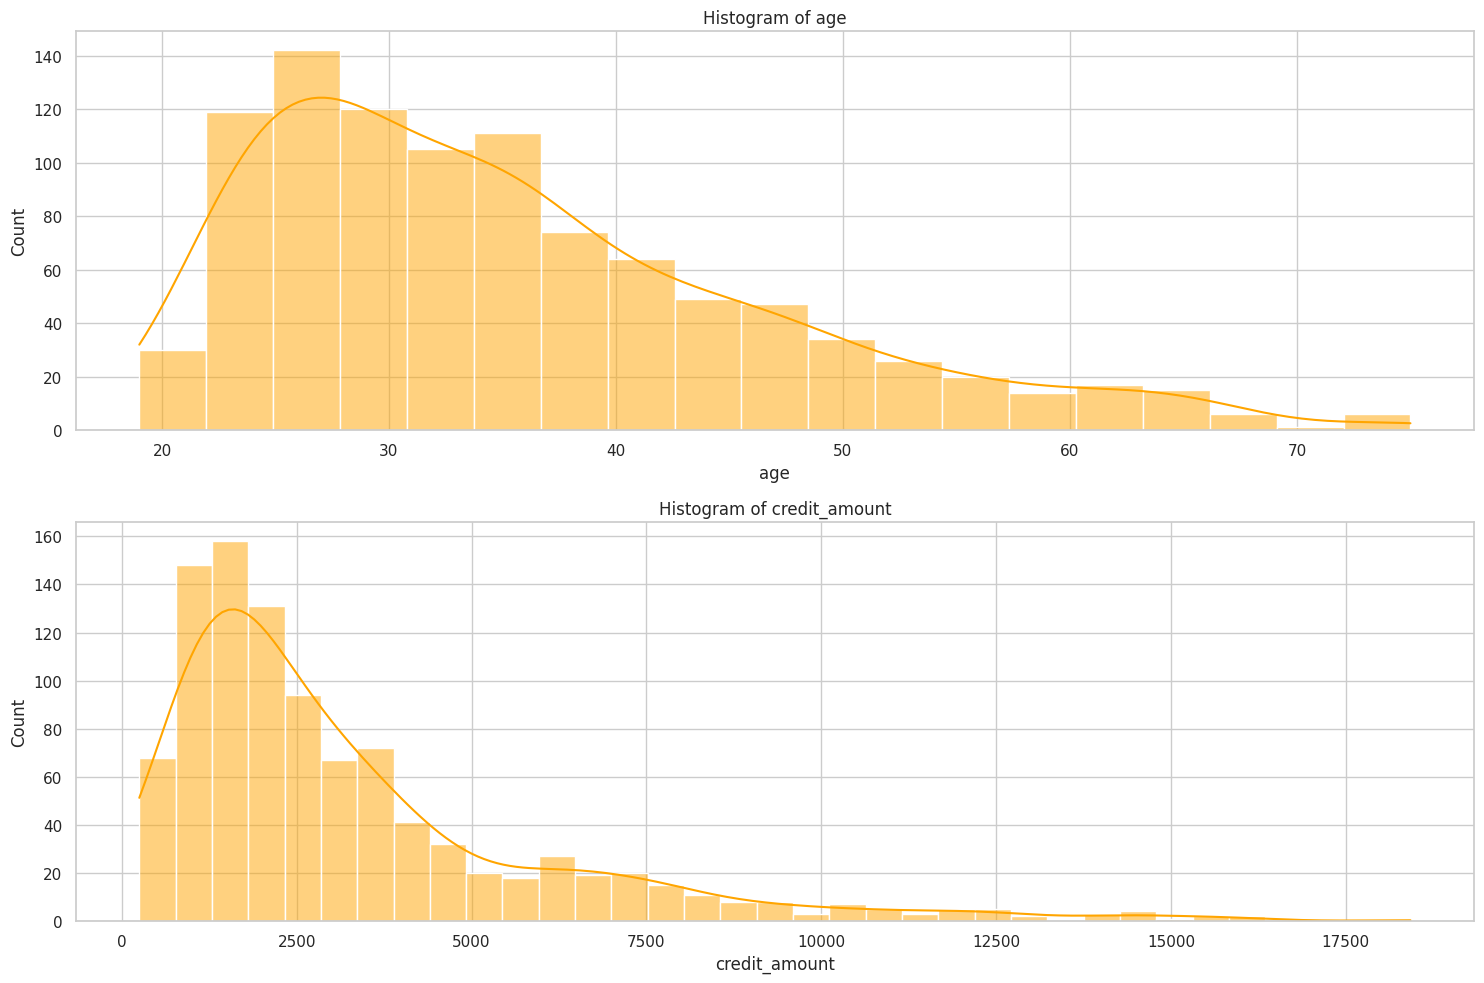

In [ ]:
numerical_columns = ["age", "credit_amount"]

data = df_credit

fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(15, 5 * len(numerical_columns)))

for i, column in enumerate(numerical_columns):
  sns.histplot(data.dropna()[column], kde=True, ax=axes[i], color='orange')
  axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

<ipython-input-93-3d0d715818ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risk', y='age', data=df_credit, palette="Set1")


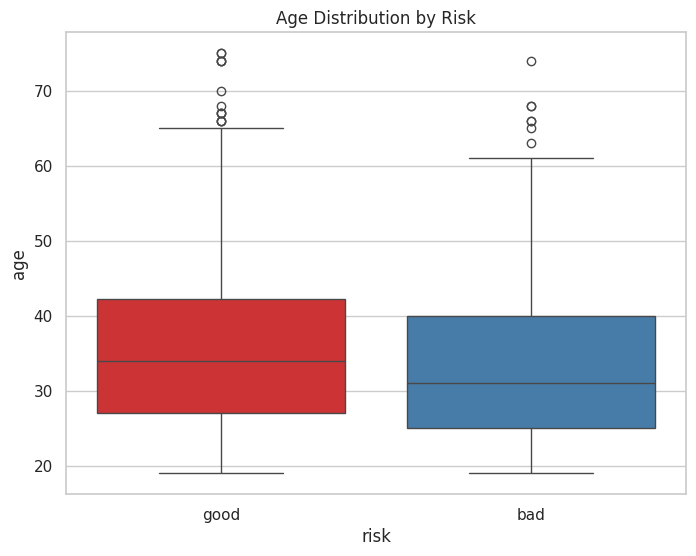

<ipython-input-93-3d0d715818ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risk', y='credit_amount', data=df_credit, palette="Set2")


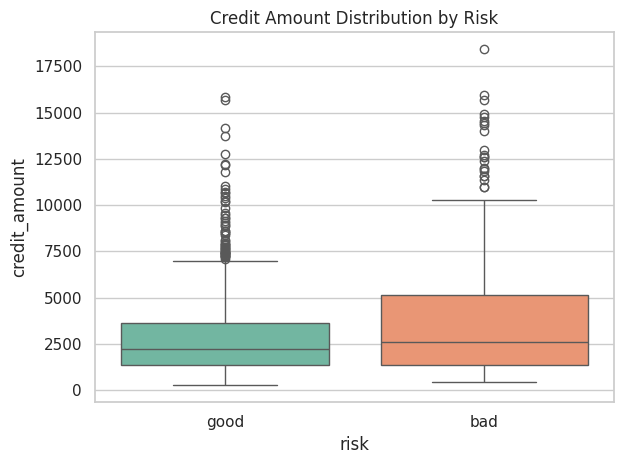

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='risk', y='age', data=df_credit, palette="Set1")
plt.title('Age Distribution by Risk')
plt.show()

sns.boxplot(x='risk', y='credit_amount', data=df_credit, palette="Set2")
plt.title('Credit Amount Distribution by Risk')

plt.tight_layout()
plt.show()

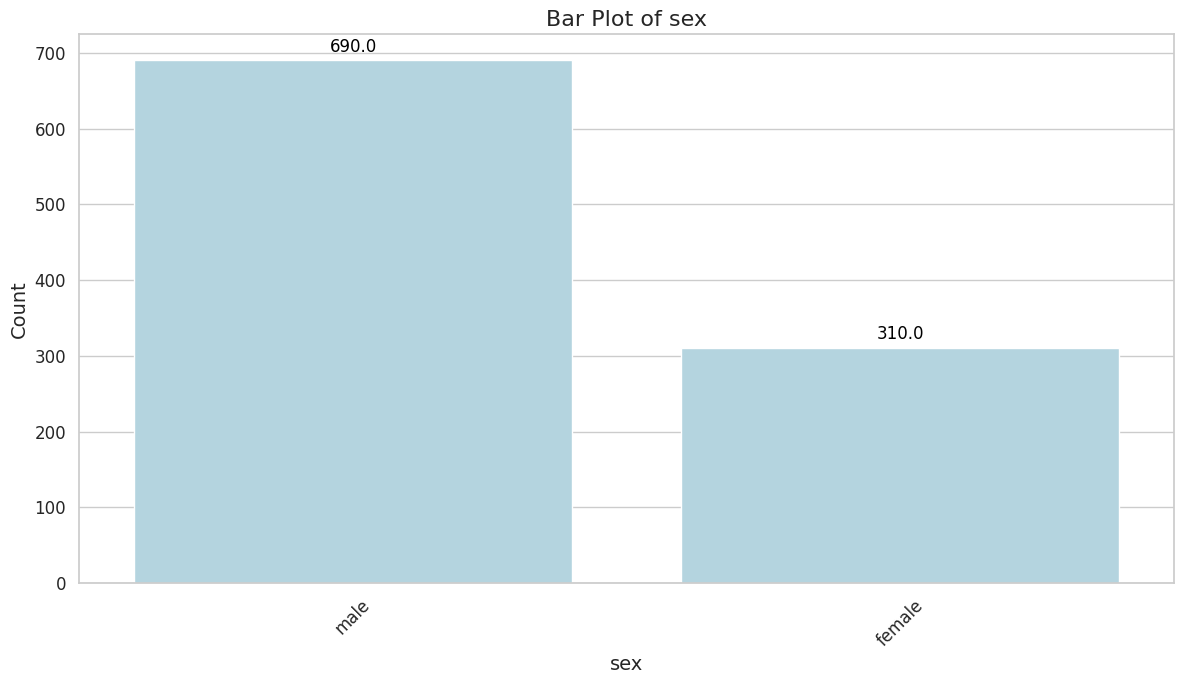

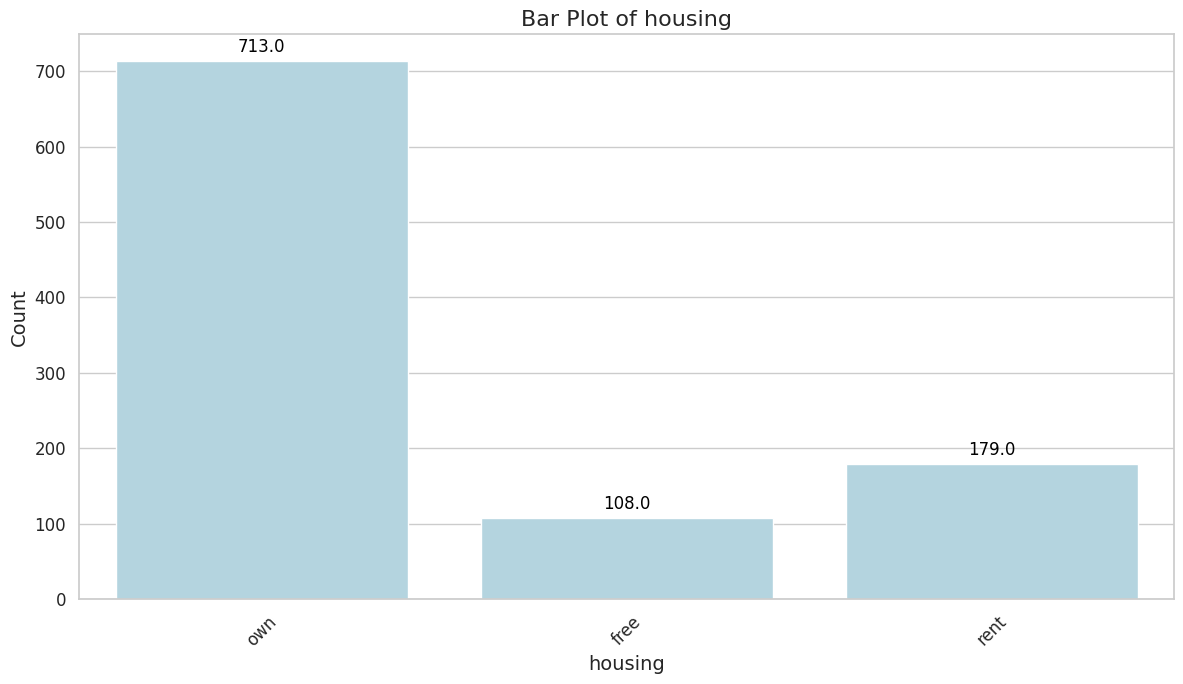

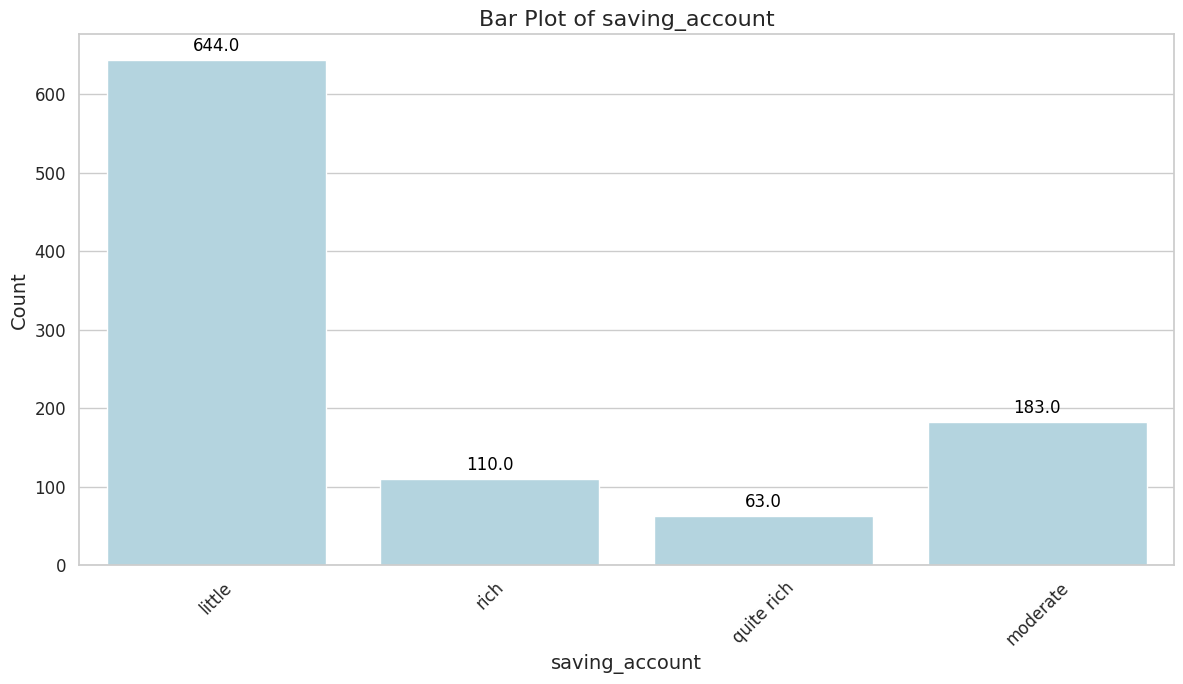

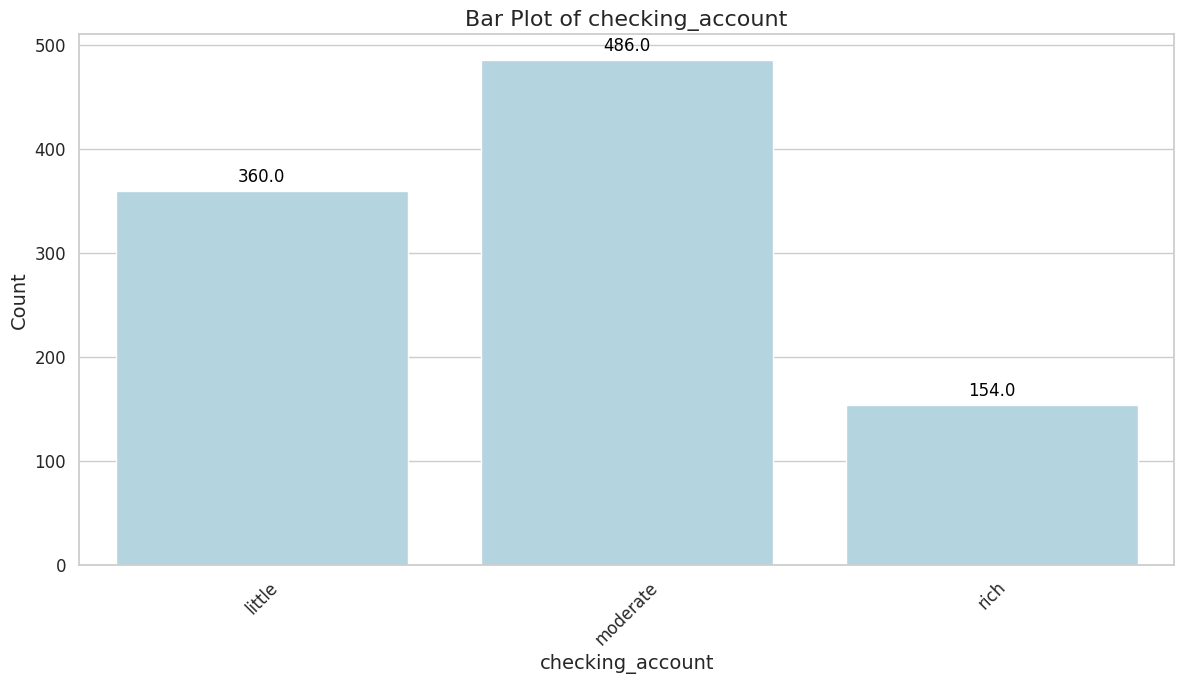

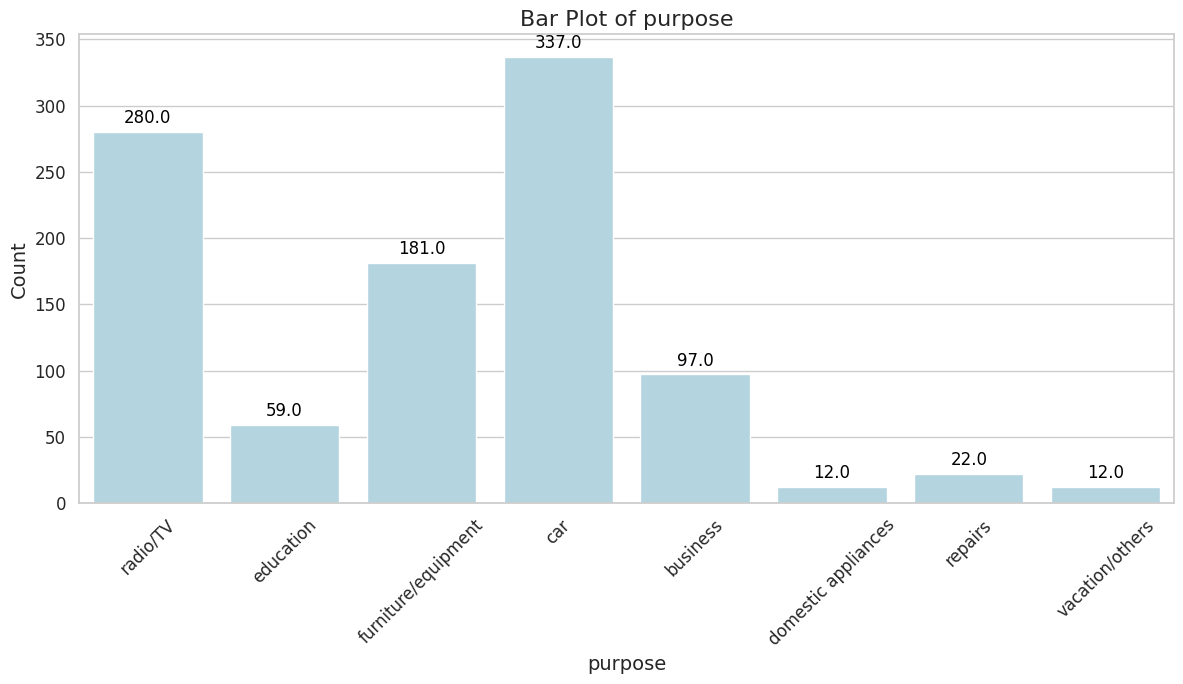

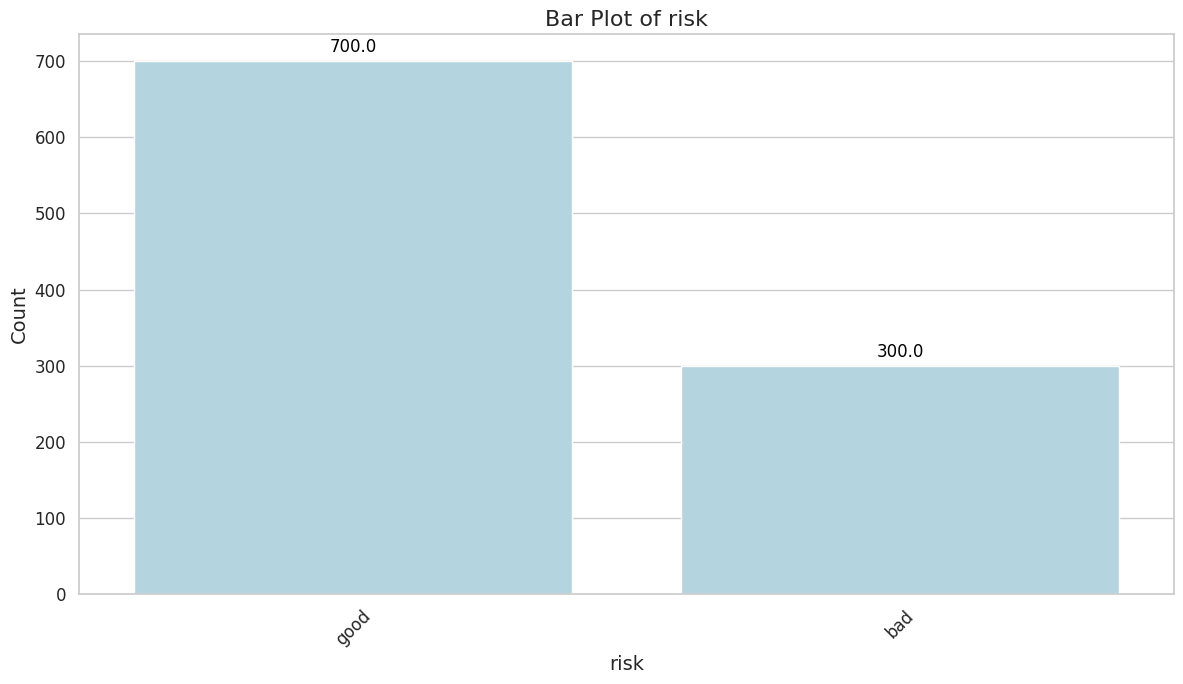

In [ ]:
from scipy.stats import chi2_contingency

# Frequency tables for categorical variables
categorical_columns = ['sex', 'housing', 'saving_account', 'checking_account', 'purpose', 'risk']
frequency_tables = {col: df_credit[col].value_counts() for col in categorical_columns}

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualize categories using bar plots
for col in categorical_columns:
    plt.figure(figsize=(12, 7))
    ax = sns.countplot(data=df_credit, x=col, color="lightblue")
    plt.title(f'Bar Plot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Add counts above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()


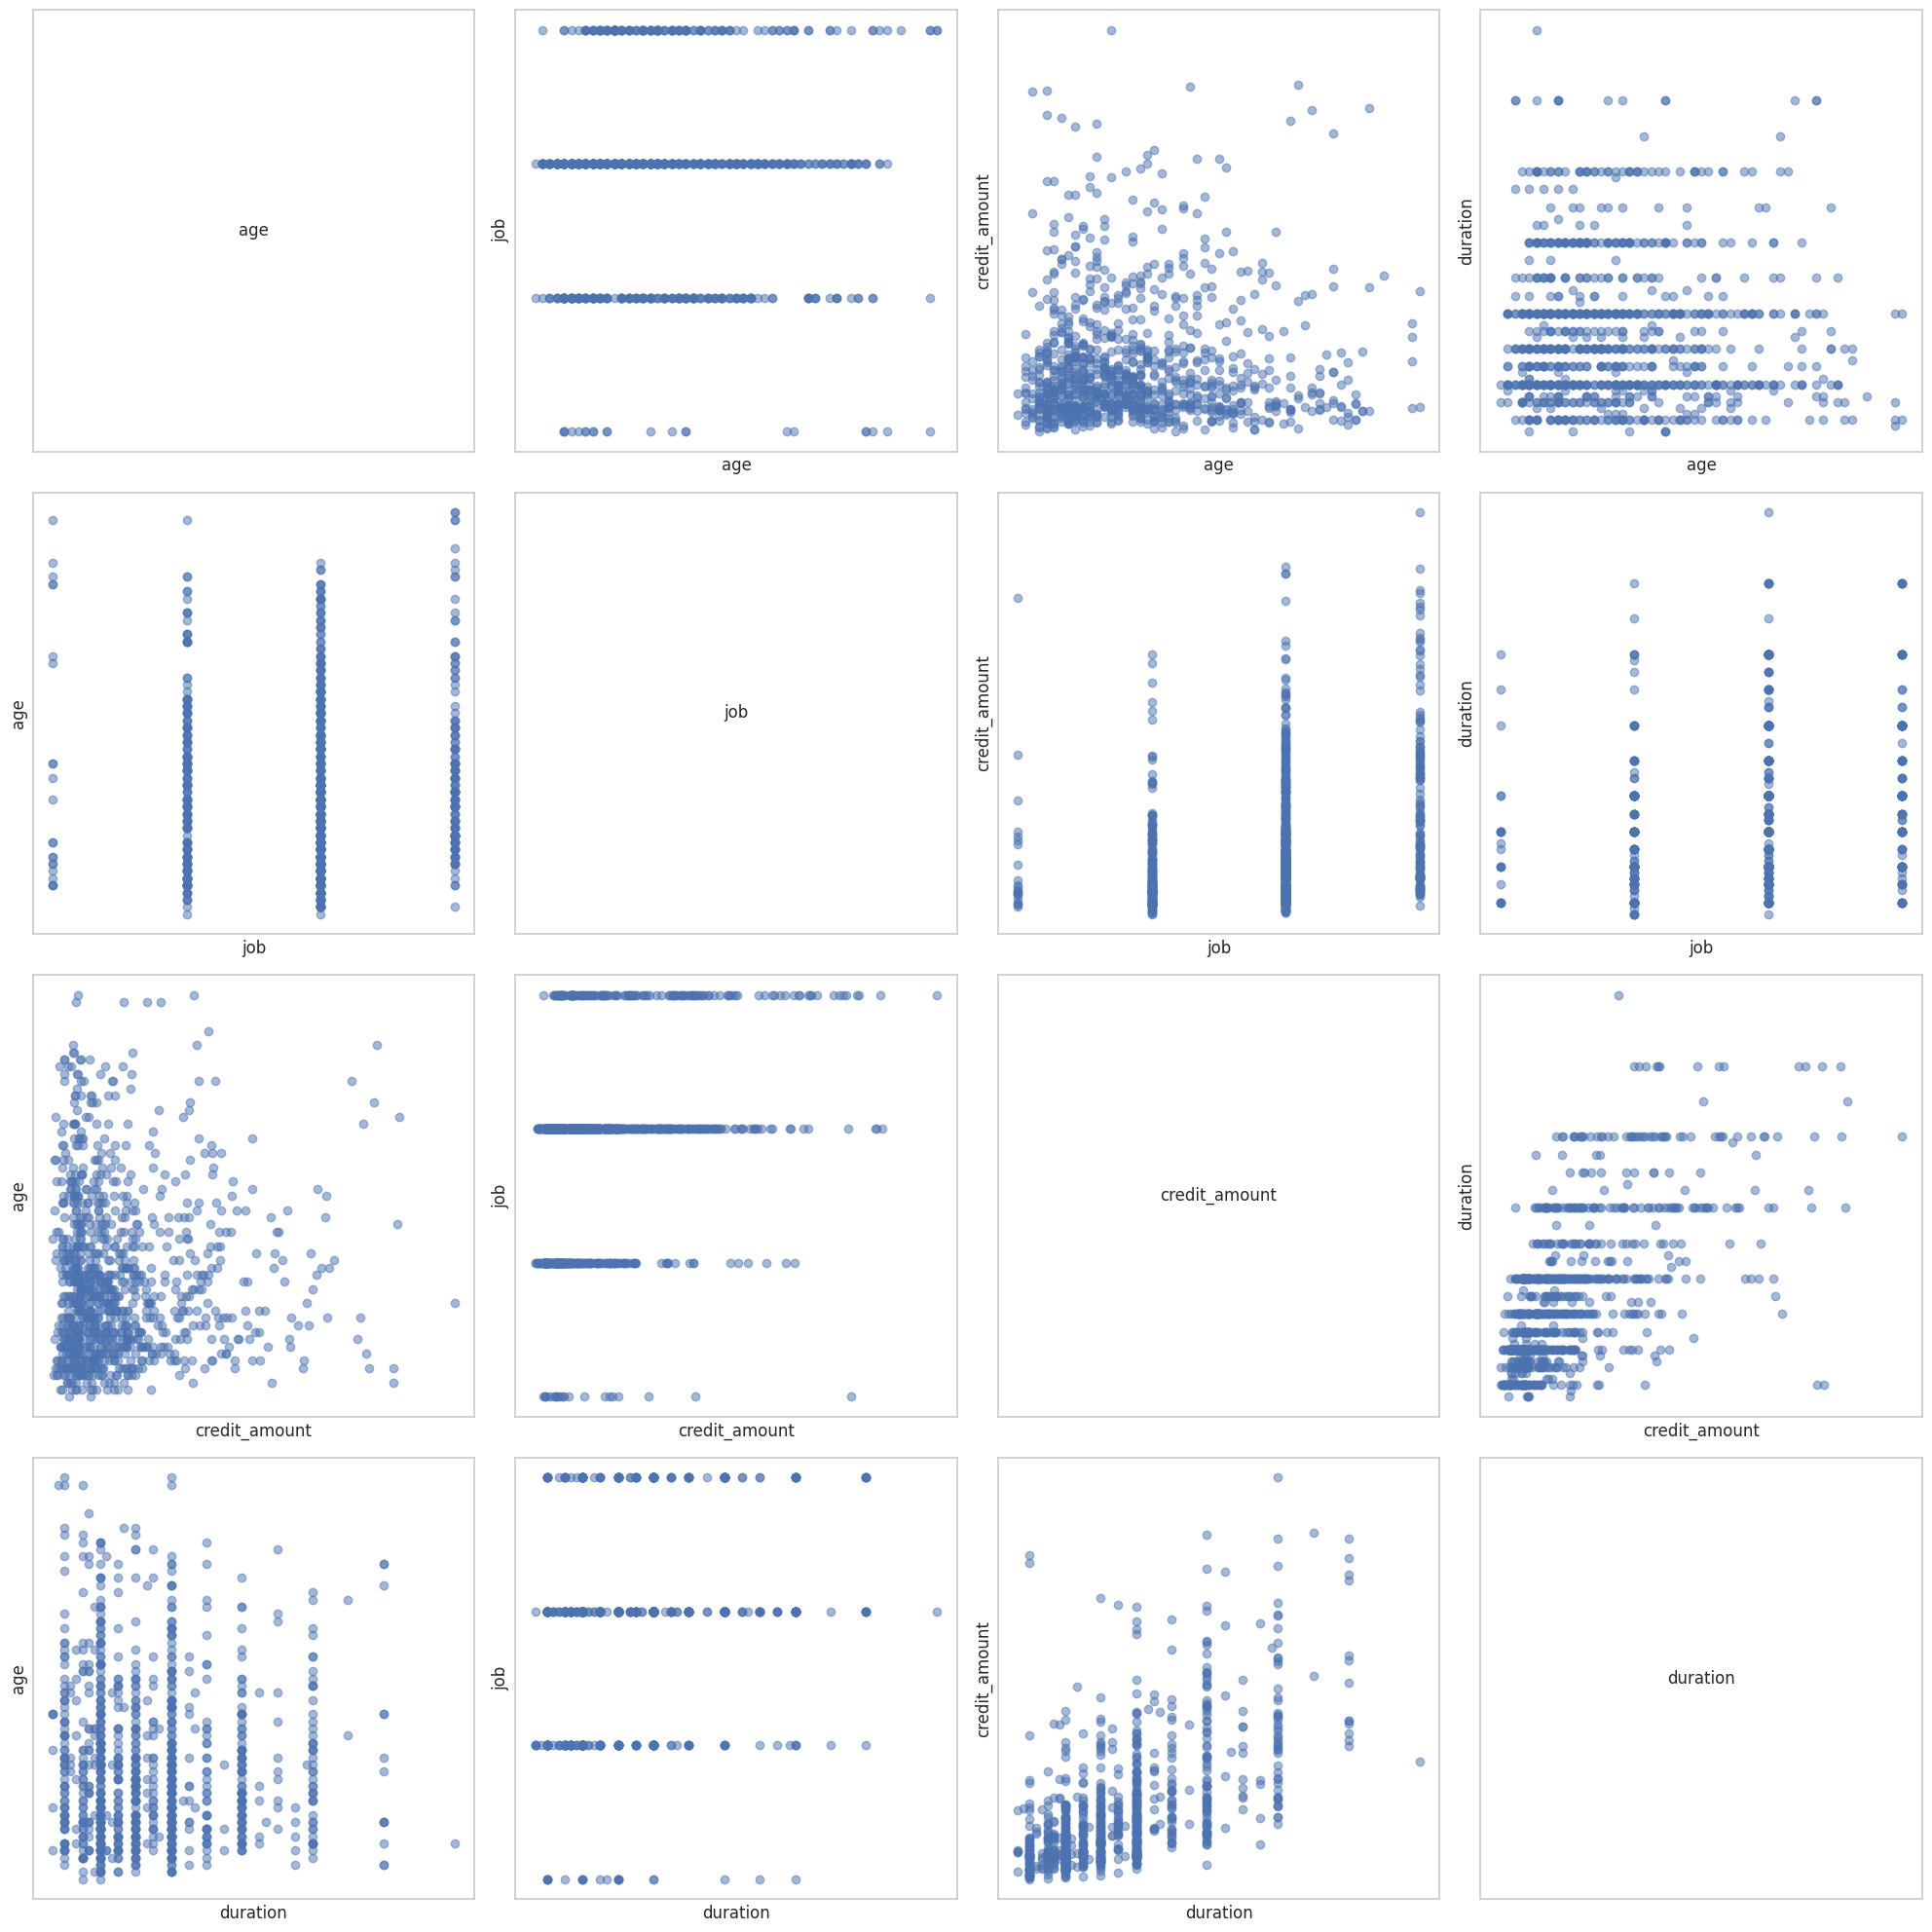

                    age       job  credit_amount  duration
age            1.000000  0.015673       0.032716 -0.036136
job            0.015673  1.000000       0.285385  0.210910
credit_amount  0.032716  0.285385       1.000000  0.624984
duration      -0.036136  0.210910       0.624984  1.000000


In [ ]:
# Bivariate Analysis

# Scatter plots to assess the correlation between numerical variables
numerical_columns = ["age", "job", "credit_amount", "duration"]

fig, axes = plt.subplots(len(numerical_columns), len(numerical_columns), figsize=(20, 20))

for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        if i != j:
            axes[i, j].scatter(df_credit[col1], df_credit[col2], alpha=0.5)
            axes[i, j].set_xlabel(col1)
            axes[i, j].set_ylabel(col2)
        else:
            axes[i, j].text(0.5, 0.5, col1, horizontalalignment='center', verticalalignment='center', fontsize=12)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

# Correlation coefficients and interpret them
correlation_matrix = df_credit[numerical_columns].corr()
print(correlation_matrix)

<ipython-input-96-fccd910505e6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_credit[cat_col], y=df_credit[num_col], ax=axes[i, j], palette="Set3")
<ipython-input-96-fccd910505e6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_credit[cat_col], y=df_credit[num_col], ax=axes[i, j], palette="Set3", inner=None, alpha=0.3)
<ipython-input-96-fccd910505e6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_credit[cat_col], y=df_credit[num_col], ax=axes[i, j], palette="Set3")
<ipython-input-96-fccd910505e6>:13: FutureWarning:

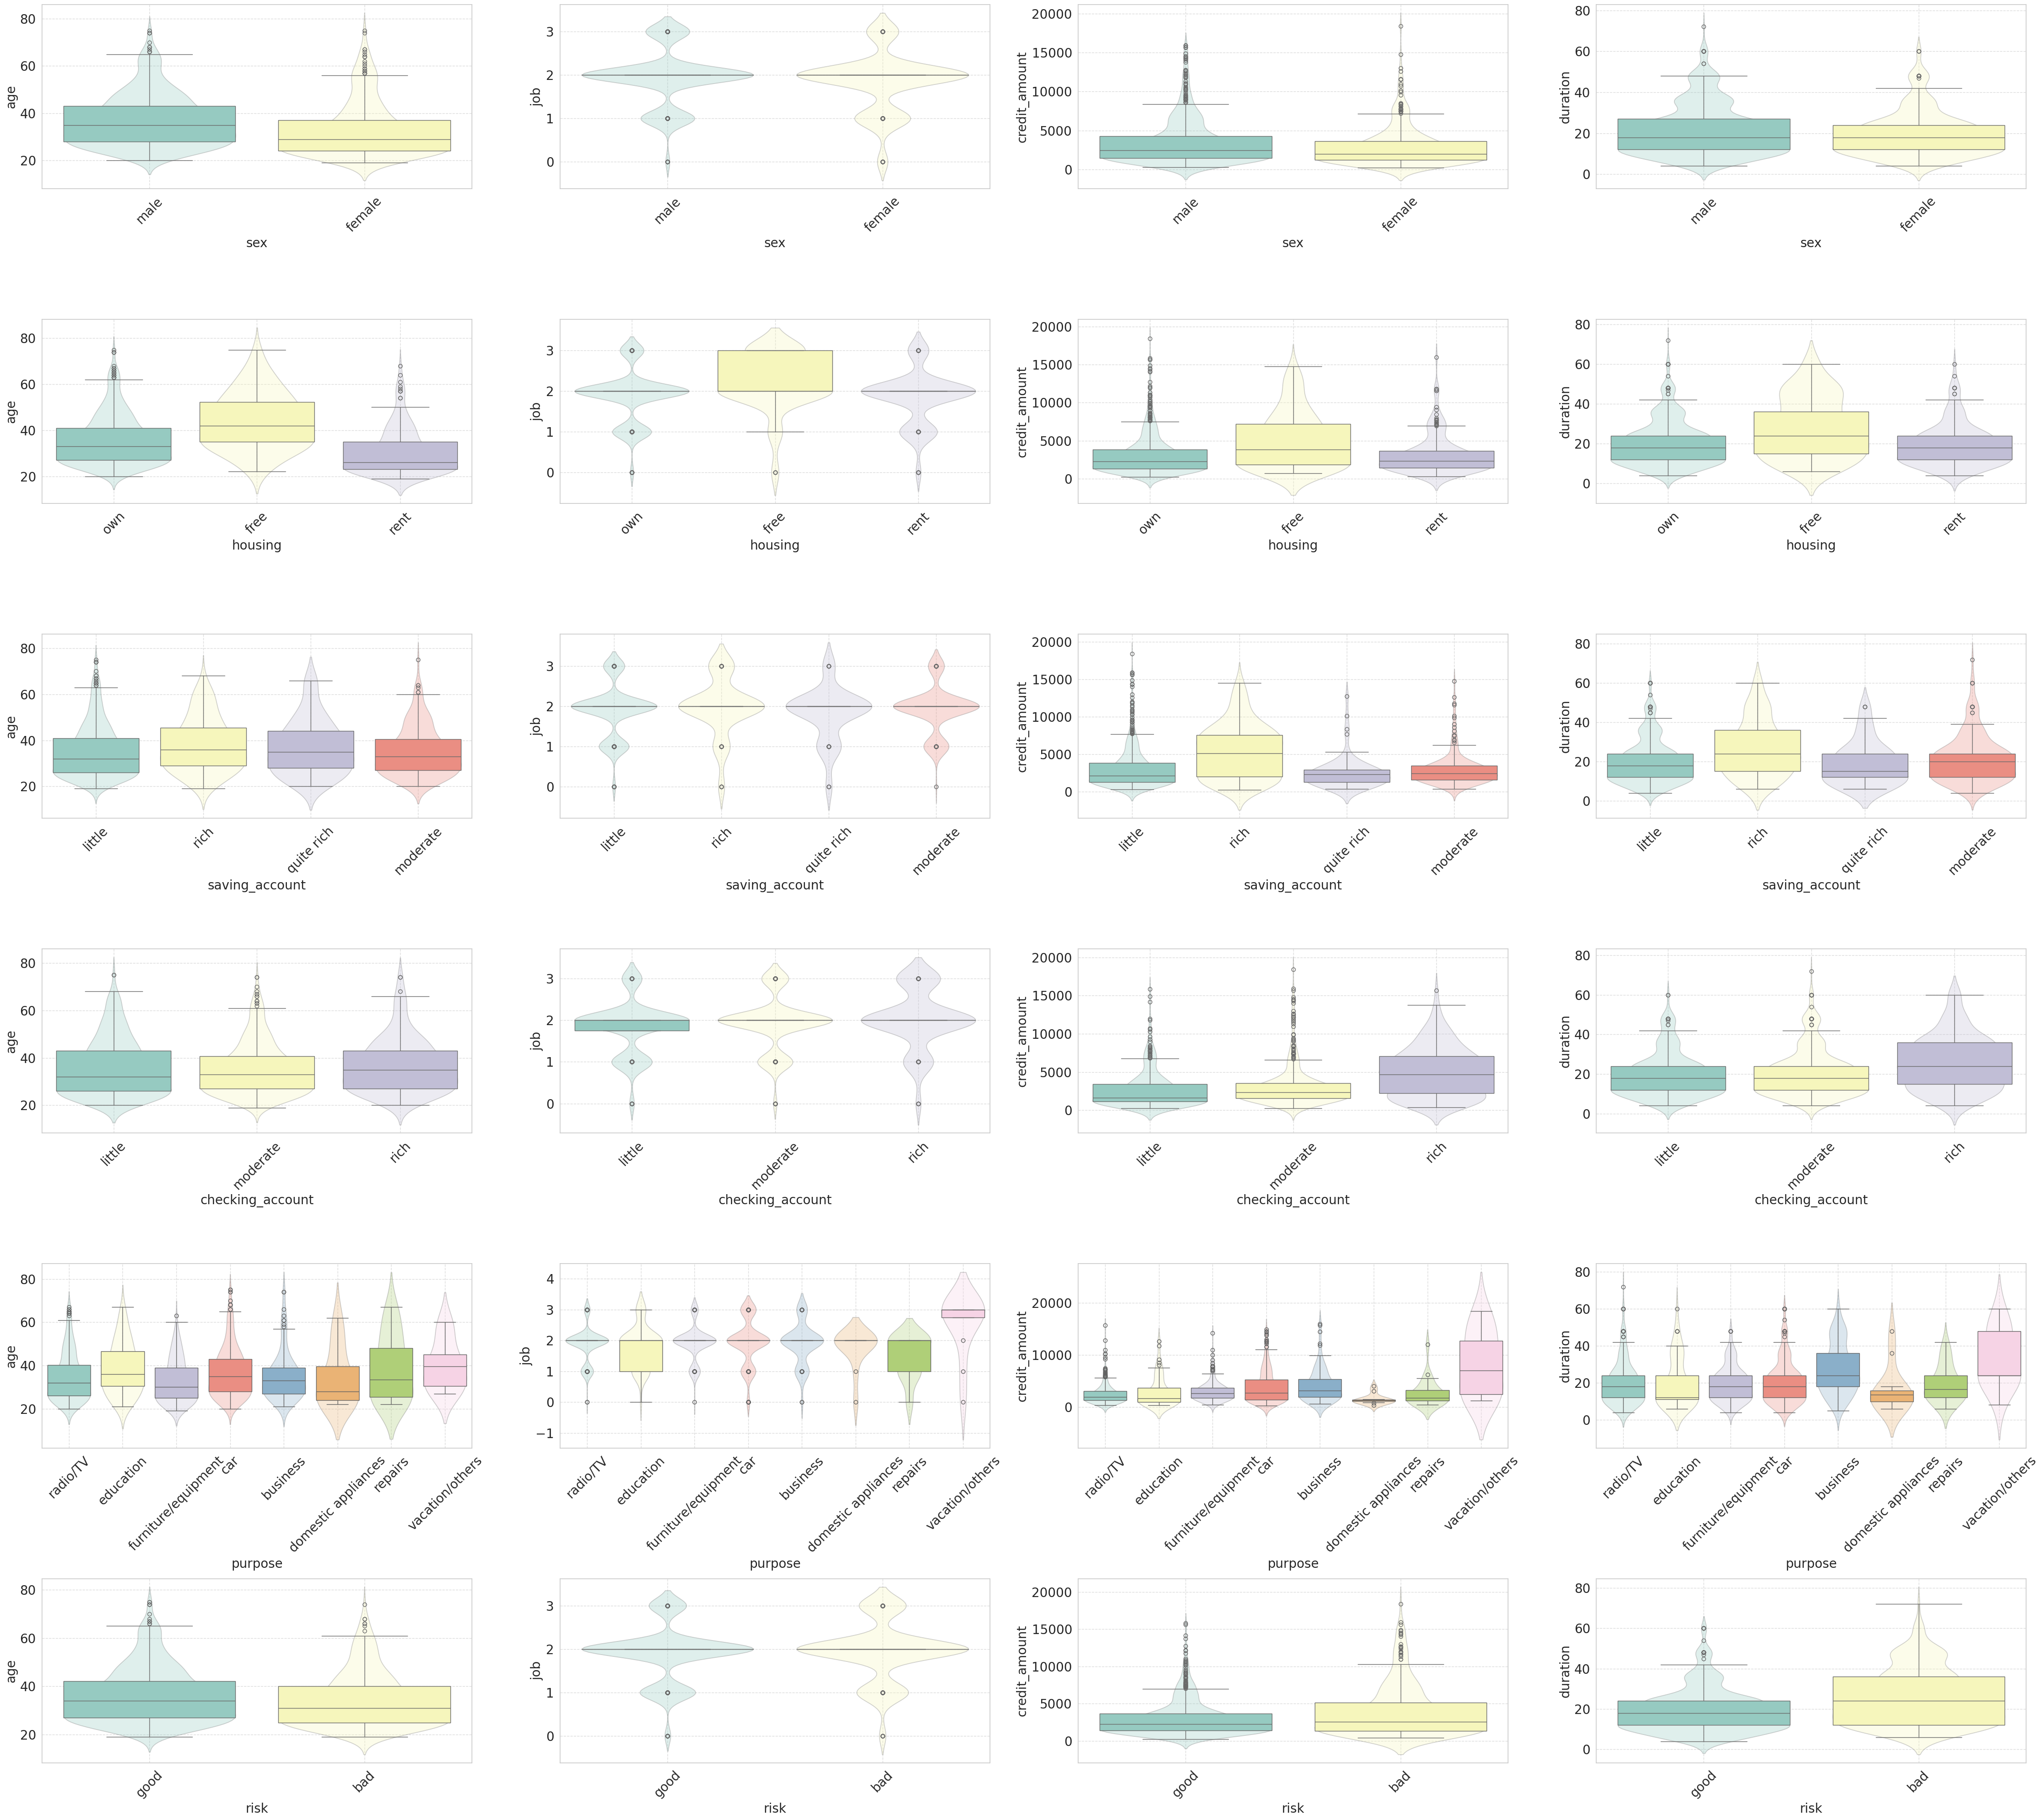

In [ ]:
# Boxplots and Violin plots for Categorical vs. Numerical Data

# Define categorical and numerical columns
categorical_columns = ['sex', 'housing', 'saving_account', 'checking_account', 'purpose', 'risk']
numerical_columns = ["age", "job", "credit_amount", "duration"]

# Create boxplots
fig, axes = plt.subplots(len(categorical_columns), len(numerical_columns), figsize=(45, 40))

for i, cat_col in enumerate(categorical_columns):
    for j, num_col in enumerate(numerical_columns):
        sns.boxplot(x=df_credit[cat_col], y=df_credit[num_col], ax=axes[i, j], palette="Set3")
        sns.violinplot(x=df_credit[cat_col], y=df_credit[num_col], ax=axes[i, j], palette="Set3", inner=None, alpha=0.3)
        axes[i, j].set_xlabel(cat_col, fontsize=20)
        axes[i, j].set_ylabel(num_col, fontsize=20)
        axes[i, j].tick_params(axis='x', rotation=45)
        axes[i, j].tick_params(axis='both', which='major', labelsize=20)
        axes[i, j].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

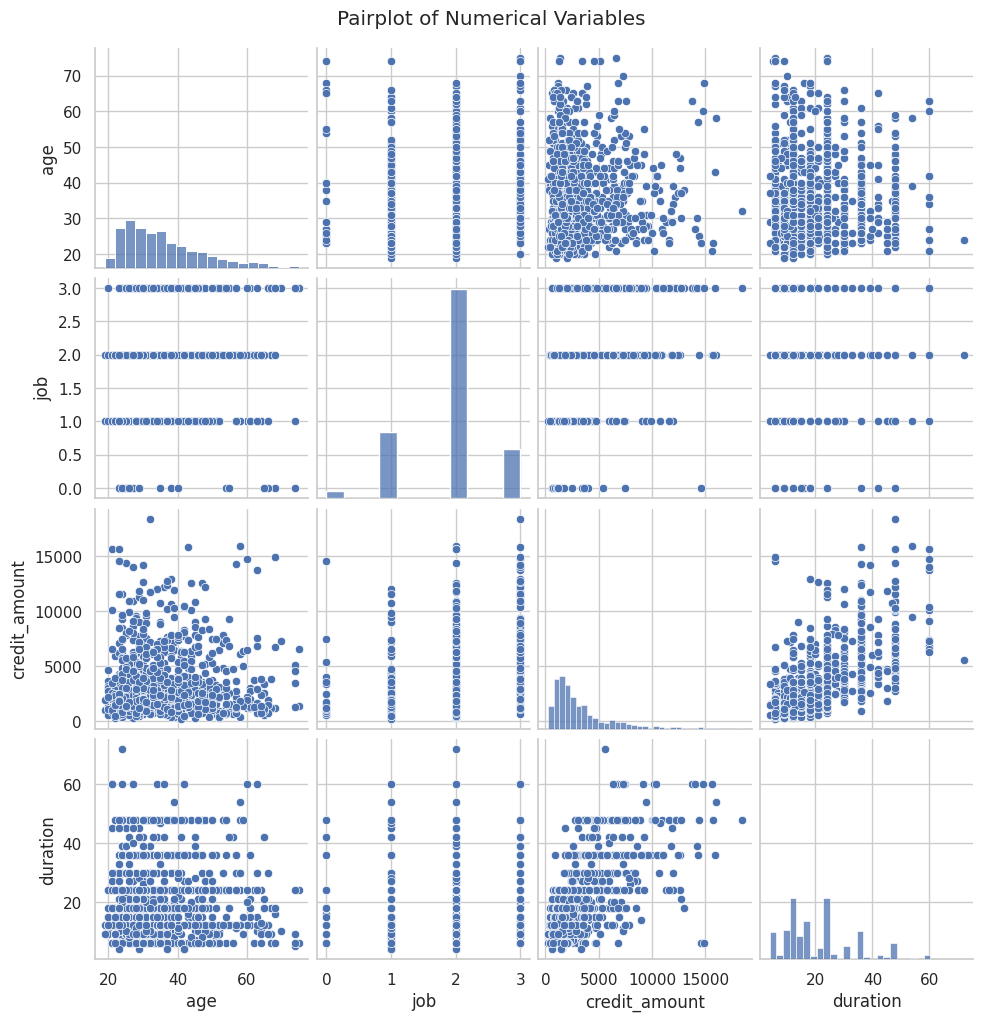

In [ ]:
sns.set_style("whitegrid")

# Create a pairplot to visualize relationship between variables
sns.pairplot(df_credit[["age","job","credit_amount","duration"]])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

# Post EDA/Cleaning

##Encoding Categorical Variables for Data Analysis

In [ ]:
# 1. Encode 'Sex' (Binary Variable: Label Encoding)
df_credit['sex'] = df_credit['sex'].map({'male': 0, 'female': 1})

# 3. Encode 'Housing' (Nominal: One-Hot Encoding)
housing_dummies = pd.get_dummies(df_credit['housing'], prefix='housing', drop_first=True)
df_credit = pd.concat([df_credit, housing_dummies], axis=1)
df_credit.drop('housing', axis=1, inplace=True)

# 4. Encode 'Saving accounts' (Ordinal: Ordinal Encoding)
saving_mapping = {'little': 1, 'moderate': 2, 'rich': 3, 'quite rich': 4}
df_credit['saving_account'] = df_credit['saving_account'].map(saving_mapping)

# 5. Encode 'Checking account' (Ordinal: Ordinal Encoding)
checking_mapping = {'little': 1, 'moderate': 2, 'rich': 3}
df_credit['checking_account'] = df_credit['checking_account'].map(checking_mapping)

# 6. Encode 'Purpose' (Nominal: One-Hot Encoding)
purpose_dummies = pd.get_dummies(df_credit['purpose'], prefix='purpose', drop_first=True)
df_credit = pd.concat([df_credit, purpose_dummies], axis=1)
df_credit.drop('purpose', axis=1, inplace=True)

# 7. Encode 'Risk' (Binary Target Variable: Label Encoding)
df_credit['risk'] = df_credit['risk'].map({'good': 0, 'bad': 1})


In [ ]:
# Display the first few rows of the encoded dataset
df_credit.head()

,age,sex,job,saving_account,checking_account,credit_amount,duration,risk,housing_own,housing_rent,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,67,0,2,1,1,1169,6,0,True,False,False,False,False,False,True,False,False
1,22,1,2,1,2,5951,48,1,True,False,False,False,False,False,True,False,False
2,49,0,1,1,2,2096,12,0,True,False,False,False,True,False,False,False,False
3,45,0,2,1,1,7882,42,0,False,False,False,False,False,True,False,False,False
4,53,0,2,1,1,4870,24,1,False,False,True,False,False,False,False,False,False


# Data Modeling & Analysis

## Logistic Regression

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          1000 non-null   int64
 1   sex                          1000 non-null   int64
 2   job                          1000 non-null   int64
 3   saving_account               1000 non-null   int64
 4   checking_account             1000 non-null   int64
 5   credit_amount                1000 non-null   int64
 6   duration                     1000 non-null   int64
 7   risk                         1000 non-null   int64
 8   housing_own                  1000 non-null   bool 
 9   housing_rent                 1000 non-null   bool 
 10  purpose_car                  1000 non-null   bool 
 11  purpose_domestic appliances  1000 non-null   bool 
 12  purpose_education            1000 non-null   bool 
 13  purpose_furniture/equipment  1000 non-null   bool

The Boolean variables must be converted into dummy variables (True = 1, False = 0) to be useable in the logistic regression. Moreover, to simplify the model, related purposes (such as domestic appliances and furniture/equipment, radio/TV and repairs) are combined.

In [ ]:
# Create a copy of the original dataset
df_credit_log = df_credit.copy()

# Specify the columns to work with
boolean_columns = [
    "housing_own",
    "housing_rent",
    "purpose_car",
    "purpose_domestic appliances",
    "purpose_education",
    "purpose_furniture/equipment",
    "purpose_radio/TV",
    "purpose_repairs",
    "purpose_vacation/others",
]

# Convert Boolean columns to integers
df_credit_log[boolean_columns] = df_credit_log[boolean_columns].astype(int)

# Combine specified columns into new ones
df_credit_log["purpose_equipment"] = (
    df_credit_log["purpose_domestic appliances"] | df_credit_log["purpose_furniture/equipment"]
).astype(int)

df_credit_log["purpose_services"] = (
    df_credit_log["purpose_radio/TV"] | df_credit_log["purpose_repairs"]
).astype(int)

# Drop the old columns that were combined
columns_to_drop = [
    "purpose_domestic appliances",
    "purpose_furniture/equipment",
    "purpose_radio/TV",
    "purpose_repairs",
]

df_credit_log.drop(columns=columns_to_drop, inplace=True)

df_credit_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1000 non-null   int64
 1   sex                      1000 non-null   int64
 2   job                      1000 non-null   int64
 3   saving_account           1000 non-null   int64
 4   checking_account         1000 non-null   int64
 5   credit_amount            1000 non-null   int64
 6   duration                 1000 non-null   int64
 7   risk                     1000 non-null   int64
 8   housing_own              1000 non-null   int64
 9   housing_rent             1000 non-null   int64
 10  purpose_car              1000 non-null   int64
 11  purpose_education        1000 non-null   int64
 12  purpose_vacation/others  1000 non-null   int64
 13  purpose_equipment        1000 non-null   int64
 14  purpose_services         1000 non-null   int64
dtypes: in

## Logistic Regression : Multiple Independent Variables

### Logistic Regression Using All Variables

The variable of interest is Risk. The goal is to discover how the following variables affect credit risk (good = 0, bad = 1):
* age
* sex
* job
* saving_account
* checking_account
* credit_amount
* duration
* housing_own
* housing_rent
* purpose_car
* purpose_education
* purpose_vacation/others
* purpose_equipment
* purpose_services

This model uses all available explanatory variables (age, sex, job, account types, loan features, etc.) to predict the risk of a loan applicant. This provides a comprehensive view of which variables influence risk the most.

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
X = df_credit_log[[
    'age', 'sex', 'job', 'saving_account', 'checking_account',
    'credit_amount', 'duration', 'housing_own', 'housing_rent',
    'purpose_car', 'purpose_education', 'purpose_vacation/others',
    'purpose_equipment', 'purpose_services'
]]
y = df_credit_log['risk']  # Lowercase for the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Add constant to X_train and fit the model
X_train_with_const = sm.add_constant(X_train)  # Adds intercept
logit_model_all = sm.Logit(y_train, X_train_with_const)
result_all = logit_model_all.fit()

# Print detailed summary
print(result_all.summary2())

# Predictions on test set
X_test_with_const = sm.add_constant(X_test)
y_pred_prob_all = result_all.predict(X_test_with_const)
y_pred_all = (y_pred_prob_all >= 0.5).astype(int)

# Evaluate performance
print("\nClassification Report (All Variables):")
print(classification_report(y_test, y_pred_all))

print("\nConfusion Matrix (All Variables):")
print(confusion_matrix(y_test, y_pred_all))

Optimization terminated successfully.
         Current function value: 0.551668
         Iterations 6
                            Results: Logit
Model:                Logit              Method:             MLE       
Dependent Variable:   risk               Pseudo R-squared:   0.099     
Date:                 2024-12-02 13:52   AIC:                857.5013  
No. Observations:     750                BIC:                926.8024  
Df Model:             14                 Log-Likelihood:     -413.75   
Df Residuals:         735                LL-Null:            -458.99   
Converged:            1.0000             LLR p-value:        3.0752e-13
No. Iterations:       6.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                    0.4666   0.6648  0.7019 0.4828 -0.8364

**Coefficients and P-Values Interpretation:**

1. **saving_account**:
   - Coefficient: -0.3083, P-value: 0.0037
   - **Interpretation**: People with a higher saving account balance are less likely to be a bad risk (i.e., more likely to be good credit risks). This is a strong and statistically significant predictor.

2. **checking_account**:
   - Coefficient: -0.5814, P-value: <0.0001
   - **Interpretation**: People with a checking account are less likely to be a bad risk, and this predictor is very strong and highly significant. Applicants with checking accounts are better candidates for credit.

3. **duration**:
   - Coefficient: 0.0357, P-value: 0.0001
   - **Interpretation**: The longer the loan duration, the higher the likelihood of being a bad risk. The positive coefficient indicates that, with each additional unit of time in the loan term, the risk increases.

4. **Non-Significant Predictors**:
    - Variables such as sex, job, housing, and most purposes (e.g., car, education) are not statistically significant (p > 0.1), indicating they don't strongly influence risk in this dataset.

**Model Fit and Performance:**

- **Pseudo R-squared (0.099)**: The model explains about 9.9% of the variability in risk, which is typical for binary classification models. While it indicates some variance is unexplained, the model is capturing significant risk factors.
  
- **AIC (857.50)**: The AIC value suggests a relatively good fit, though not perfect, as it is a bit high for classification models. Lower values of AIC are better, but this isn't poor by any means.
  
- **LLR p-value (3.0752e-13)**: This indicates that the model is statistically significant overall, showing that the chosen variables contribute meaningfully to predicting risk.

**Classification Report and Confusion Matrix:**

- **Overall Accuracy (74%)**: The model predicts risk correctly for 74% of cases, which is reasonable for a binary classification model.

**Class-Specific Metrics:**

- **Good Risk (class 0)**:
  - **Precision**: 75% – 75% of the predicted "good" cases are truly good.
  - **Recall**: 95% – 95% of actual "good" cases are correctly identified, meaning the model avoids most false negatives for "good" risk.
  - **F1-score**: 84% – A solid balance between precision and recall for "good" risk.

- **Bad Risk (class 1)**:
  - **Precision**: 68% – 68% of predicted "bad" cases are truly bad.
  - **Recall**: 26% – Only 26% of actual "bad" cases are identified as bad, indicating poor sensitivity for "bad" risk.
  - **F1-score**: 37% – This highlights the model’s difficulty in accurately identifying "bad" risk cases.

**Confusion Matrix**:
- **Bias Toward Class 0 (Good Risk)**: The model correctly predicts 167 "good" cases but misclassifies 55 "bad" cases as "good."
- It only correctly identifies 19 out of 74 "bad" cases, resulting in a high number of false negatives for "bad" risk.


### Significant Variables

This model is a reduced version that removes insignificant variables based on p-values. Only the variables that are statistically significant in predicting risk are retained: saving_account, checking_account, and duration.

In [ ]:
# Define features based on statistically significant variables
X_refit = df_credit_log[['saving_account', 'checking_account', 'duration']]

# Split the data
X_train_refit, X_test_refit, y_train_refit, y_test_refit = train_test_split(
    X_refit, y, test_size=0.25, random_state=0
)

# Add constant and fit the model
X_train_refit_with_const = sm.add_constant(X_train_refit)
logit_model_refit = sm.Logit(y_train_refit, X_train_refit_with_const)
result_refit = logit_model_refit.fit()

# Print detailed summary
print(result_refit.summary2())

# Predictions on test set
X_test_refit_with_const = sm.add_constant(X_test_refit)
y_pred_prob_refit = result_refit.predict(X_test_refit_with_const)
y_pred_refit = (y_pred_prob_refit >= 0.5).astype(int)

# Evaluate performance
print("\nClassification Report (Refit):")
print(classification_report(y_test_refit, y_pred_refit))

print("\nConfusion Matrix (Refit):")
print(confusion_matrix(y_test_refit, y_pred_refit))

Optimization terminated successfully.
         Current function value: 0.566610
         Iterations 5
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: risk             Pseudo R-squared: 0.074     
Date:               2024-12-02 13:52 AIC:              857.9147  
No. Observations:   750              BIC:              876.3950  
Df Model:           3                Log-Likelihood:   -424.96   
Df Residuals:       746              LL-Null:          -458.99   
Converged:          1.0000           LLR p-value:      1.1052e-14
No. Iterations:     5.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.3557   0.2675 -1.3299 0.1836 -0.8799  0.1685
saving_account    -0.2957   0.1037 -2.8508 0.0044 -0.4990 -0.0924


**Coefficients and P-Values Interpretation:**

1. **saving_account**:
   - Coefficient: -0.2957, P-value: 0.0044
   - **Interpretation**: The negative coefficient suggests that higher saving account balances are associated with a lower likelihood of being a bad risk, further reinforcing this as a strong and significant predictor.

2. **checking_account**:
   - Coefficient: -0.5785, P-value: <0.0001
   - **Interpretation**: Those with a checking account are significantly less likely to be a bad risk. This predictor is strong, emphasizing the importance of checking accounts in predicting good creditworthiness.

3. **duration**:
   - Coefficient: 0.0451, P-value: <0.0001
   - **Interpretation**: The positive coefficient of duration indicates that longer loan durations increase the likelihood of being a bad risk. This result is consistent with the original model, highlighting time as a key factor in predicting bad risk.

**Model Fit and Performance:**

- **Pseudo R-squared (0.074)**: The model explains about 7.4% of the variability in risk, slightly lower than the previous model but still typical for binary classification tasks.
  
- **AIC (857.91)**: The AIC is close to the previous model’s value, suggesting that dropping insignificant variables didn't significantly affect the model's fit.

- **LLR p-value (1.1052e-14)**: This indicates that the reduced model is still highly statistically significant, supporting the hypothesis that these variables are crucial in predicting risk.

**Classification Report and Confusion Matrix:**

- **Overall Accuracy (74%)**: The accuracy remains unchanged, indicating that dropping insignificant variables didn’t improve or degrade the model’s overall performance.

**Class-Specific Metrics:**

- **Good Risk (class 0)**:
  - **Precision**: 74% – 74% of predicted "good" cases are truly good.
  - **Recall**: 96% – The model performs excellently in detecting "good" risk cases, correctly identifying 96% of them.
  - **F1-score**: 84% – A strong balance of precision and recall for "good" risk.

- **Bad Risk (class 1)**:
  - **Precision**: 68% – 68% of predicted "bad" cases are truly bad.
  - **Recall**: 20% – The model is still not good at identifying "bad" risk cases, as it only correctly classifies 20% of them.
  - **F1-score**: 31% – The model's ability to detect "bad" risks remains quite weak.

**Confusion Matrix**:
- **Bias Toward Class 0 (Good Risk)**: The model still misclassifies a large number of "bad" risks as "good." It correctly predicts 169 "good" cases, but misidentifies 59 "bad" cases as "good."
- It identifies only 15 out of 74 "bad" cases correctly.


### Addressing Class Imbalance

This model applies class balancing to correct for the class imbalance problem, giving higher weight to the minority class (high-risk applicants). This is especially necessary in imbalanced datasets where the minority class (bad risk) is often misclassified.

In [ ]:
# Add constant and fit the model with balanced weights
logit_model_balanced = sm.Logit(y_train_refit, X_train_refit_with_const)
result_balanced = logit_model_balanced.fit()

# Print detailed summary
print(result_balanced.summary2())

# Predictions on test set
y_pred_prob_balanced = result_balanced.predict(X_test_refit_with_const)
y_pred_balanced = (y_pred_prob_balanced >= 0.5).astype(int)

# Evaluate performance
print("\nClassification Report (Balanced Refit):")
print(classification_report(y_test_refit, y_pred_balanced))

print("\nConfusion Matrix (Balanced Refit):")
print(confusion_matrix(y_test_refit, y_pred_balanced))


Optimization terminated successfully.
         Current function value: 0.566610
         Iterations 5
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: risk             Pseudo R-squared: 0.074     
Date:               2024-12-02 13:52 AIC:              857.9147  
No. Observations:   750              BIC:              876.3950  
Df Model:           3                Log-Likelihood:   -424.96   
Df Residuals:       746              LL-Null:          -458.99   
Converged:          1.0000           LLR p-value:      1.1052e-14
No. Iterations:     5.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.3557   0.2675 -1.3299 0.1836 -0.8799  0.1685
saving_account    -0.2957   0.1037 -2.8508 0.0044 -0.4990 -0.0924


**Coefficients and P-Values Interpretation:**

1. **saving_account**:
   - Coefficient: -0.2957, P-value: 0.0044
   - **Interpretation**: A higher saving account balance continues to be a strong predictor of being a good risk, significantly decreasing the likelihood of being classified as a bad risk.

2. **checking_account**:
   - Coefficient: -0.5785, P-value: <0.0001
   - **Interpretation**: Having a checking account remains a strong negative predictor of bad risk, showing that those with checking accounts are more likely to be classified as good risks.

3. **duration**:
   - Coefficient: 0.0451, P-value: <0.0001
   - **Interpretation**: Longer loan durations continue to increase the likelihood of being classified as a bad risk, suggesting that time is an important factor in assessing creditworthiness.

**Model Fit and Performance:**

- **Pseudo R-squared (0.074)**: The model explains 7.4% of the variability in risk, which is consistent with the previous model.
  
- **AIC (857.91)**: The AIC is the same as in the previous model, indicating that weight balancing didn’t significantly affect the overall model fit.

- **LLR p-value (1.1052e-14)**: The model is statistically significant, confirming that these predictors still contribute meaningfully to predicting risk.

**Classification Report and Confusion Matrix:**

- **Overall Accuracy (74%)**: The accuracy remains at 74%, indicating no significant loss in fit with the weight balancing.

**Class-Specific Metrics:**

- **Good Risk (class 0)**:
  - **Precision**: 74% – 74% of predicted "good" cases are truly good.
  - **Recall**: 96% – 96% of "good" risk cases are correctly identified, showing high performance in predicting good risk.
  - **F1-score**: 84% – A good balance between precision and recall for "good" risk.

- **Bad Risk (class 1)**:
  - **Precision**: 68% – 68% of predicted "bad" cases are truly bad.
  - **Recall**: 31% – Recall has improved compared to previous models, showing that the weight balancing helps identify more "bad" risks.
  - **F1-score**: 48% – The improvement in recall for "bad" risk cases brings this metric to a more reasonable value.

**Confusion Matrix**:
- **Bias Toward Class 0 (Good Risk)**: The model correctly predicts 169 "good" cases, but still misclassifies 59 "bad" cases as "good."
- The model correctly identifies 15 "bad" risks, but more importantly, it identifies 31% of all "bad" cases compared to 26% in previous models.

### Model Comparison

Model 3 is the best because it addresses the class imbalance issue and significantly improves recall for the "bad" risk class (from 26% to 31%). This improvement means the model is now better at identifying high-risk individuals, which is crucial for tasks like credit scoring where false negatives are more costly than false positives.

- The recall for "bad" risk is more important than precision in this context because failing to identify a high-risk individual (false negative) can lead to substantial losses.
- Model 3 does this without drastically compromising accuracy (remains at 74%) and improves the model's overall performance, especially for detecting bad risks.

## SHAP

In [ ]:
# Importing the necessary libraries
import shap
from sklearn.linear_model import LogisticRegression

shap.initjs()

### Defining the Explainer for the SHAP Values

In [ ]:
# Make the logit model usable by SHAP
logit_model_balanced = LogisticRegression(random_state=0, max_iter=10000)
logit_model_balanced.fit(X_train_refit_with_const, y_train_refit)

# Define mask for the explainer
masker = shap.maskers.Independent(X_train_refit_with_const)

# Define explainer
explainer = shap.Explainer(logit_model_balanced, masker=masker)
shap_values = explainer(X_train_refit_with_const)

print(shap_values)

.values =
array([[ 0.        , -0.10583127, -0.64983049,  0.15957844],
       [ 0.        ,  0.18814449, -0.07980374,  1.2384186 ],
       [ 0.        ,  0.18814449, -0.07980374, -0.37984164],
       ...,
       [ 0.        , -0.10583127, -0.07980374, -0.51469666],
       [ 0.        ,  0.18814449, -0.07980374, -0.1101316 ],
       [ 0.        , -0.10583127, -0.07980374,  0.69899852]])

.base_values =
array([-0.99228833, -0.99228833, -0.99228833, -0.99228833, -0.99228833,
       -0.99228833, -0.99228833, -0.99228833, -0.99228833, -0.99228833,
       -0.99228833, -0.99228833, -0.99228833, -0.99228833, -0.99228833,
       -0.99228833, -0.99228833, -0.99228833, -0.99228833, -0.99228833,
       -0.99228833, -0.99228833, -0.99228833, -0.99228833, -0.99228833,
       -0.99228833, -0.99228833, -0.99228833, -0.99228833, -0.99228833,
       -0.99228833, -0.99228833, -0.99228833, -0.99228833, -0.99228833,
       -0.99228833, -0.99228833, -0.99228833, -0.99228833, -0.99228833,
       -0.99228833,

### Visualizing SHAP Values

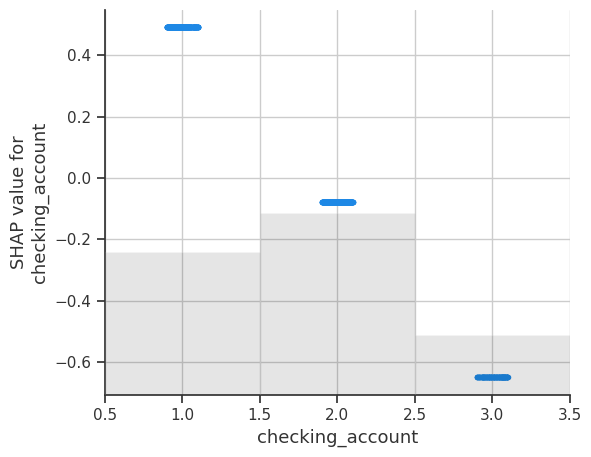

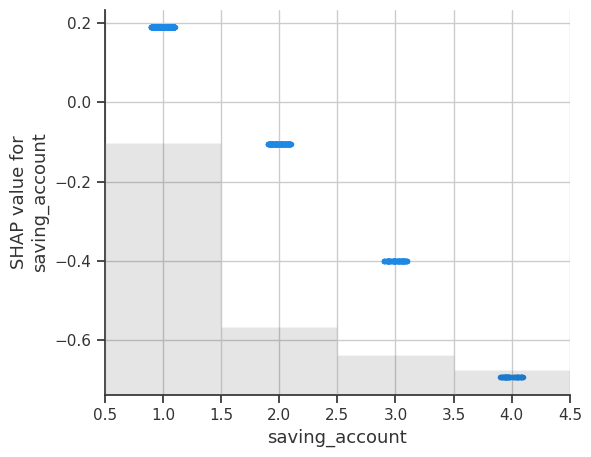

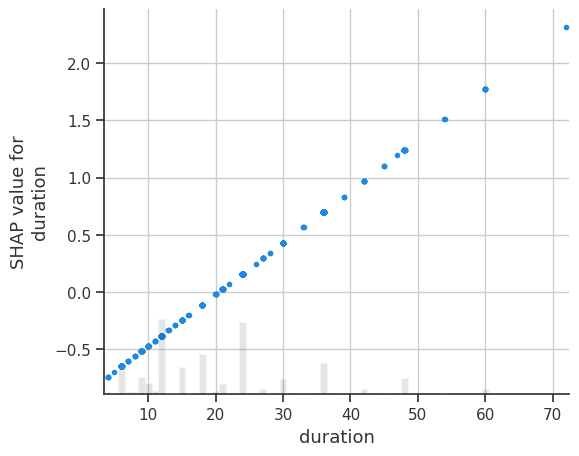

In [ ]:
# Scatterplots
shap.plots.scatter(shap_values[:, "checking_account"])
shap.plots.scatter(shap_values[:, "saving_account"])
shap.plots.scatter(shap_values[:, "duration"])

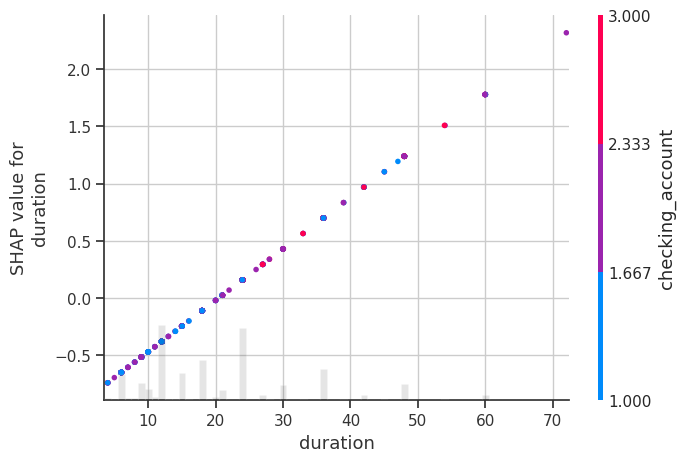

In [ ]:
# Dependence Plot
#shap.dependence_plot("duration", shap_values, X_train_refit_with_const)
shap.plots.scatter(shap_values[:,"duration"], color=shap_values)

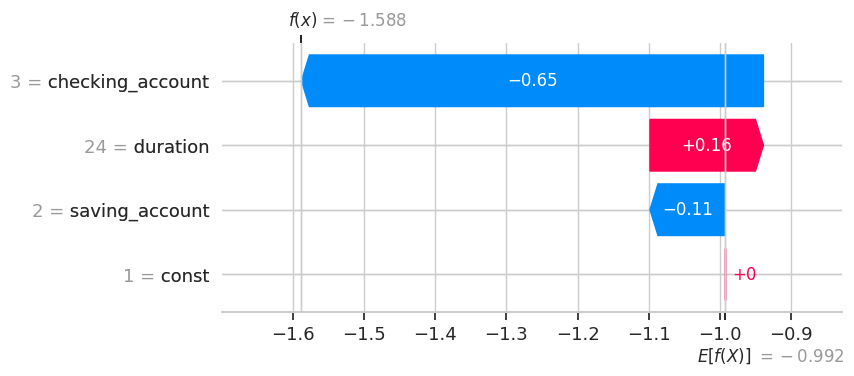

In [ ]:
# Waterfall Plot
shap.plots.waterfall(shap_values[0])

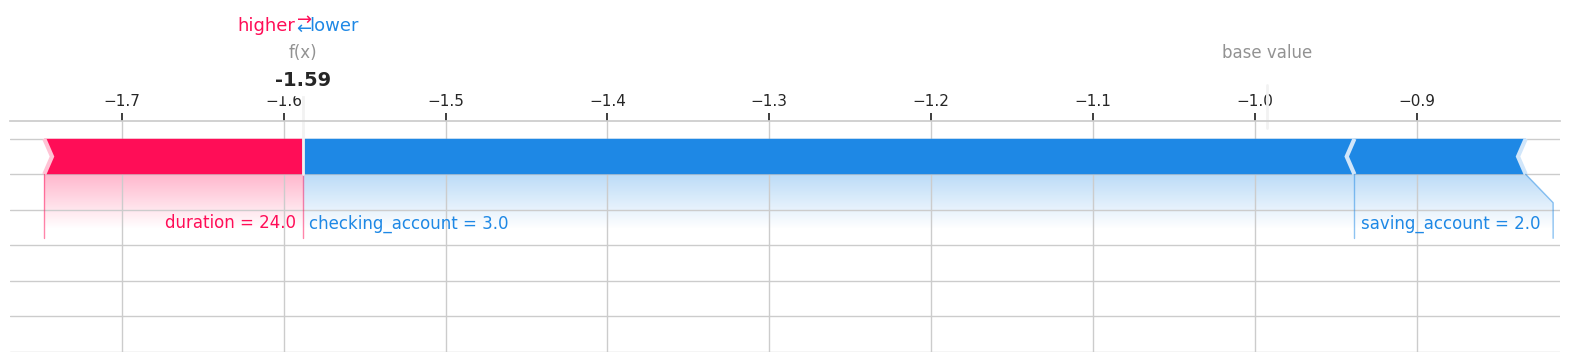

In [ ]:
# Force Plot
if isinstance(shap_values, shap.Explanation):
    shap_values = shap_values.values
shap.force_plot(explainer.expected_value, shap_values[0], X_train_refit_with_const.iloc[0, :], matplotlib=True)

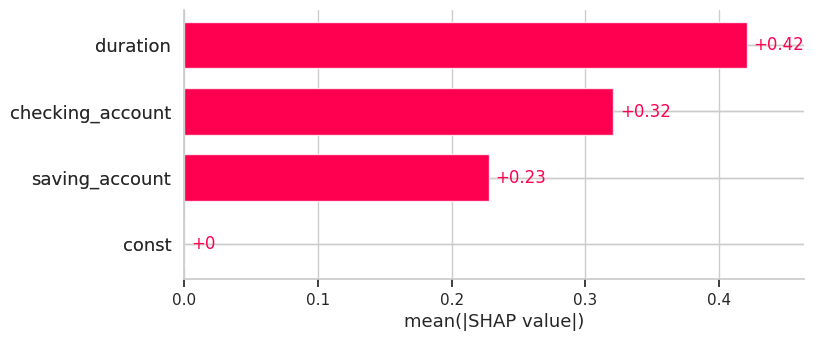

In [ ]:
shap_values = explainer(X_train_refit_with_const)
shap.plots.bar(shap_values)

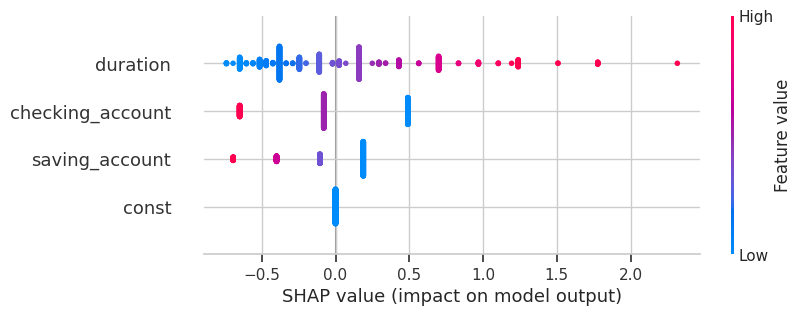

In [ ]:
# Beeswarm Plot
shap.plots.beeswarm(shap_values)